<a href="https://colab.research.google.com/github/thomascong121/SocialDistance/blob/master/camera_colibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%%capture
!pip install gluoncv
!pip install mxnet-cu101

In [0]:
import gluoncv
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict

from mxnet import nd
import mxnet as mx
from skimage import io

import cv2
import os

In [0]:
img_path = '/content/drive/My Drive/social distance/0.png'
img = io.imread(img_path)

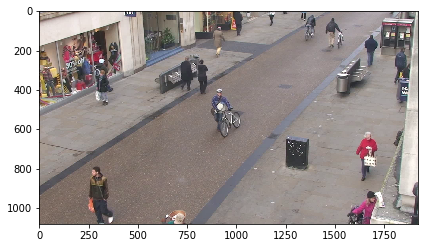

In [0]:
io.imshow(img)
io.show()

In [0]:
# keypoint = np.array([[739, 119], [990, 148], [614, 523], [229, 437]]).astype(float)
# keypoint *= 1.59
# keypoint = keypoint.astype(int)
# keypoint

In [0]:
keypoints = [(1175,  189), (1574,  235), (976,  831), (364,  694)]

In [0]:
import itertools
for i in keypoints:
    cv2.circle(img, (i[0], i[1]), 10, (0, 0, 525), -1)

for i in itertools.combinations(keypoints, 2):
    print(i)
    cv2.line(img, (i[0][0], i[0][1]), (i[1][0], i[1][1]), (0, 255, 0), 2)

((1175, 189), (1574, 235))
((1175, 189), (976, 831))
((1175, 189), (364, 694))
((1574, 235), (976, 831))
((1574, 235), (364, 694))
((976, 831), (364, 694))


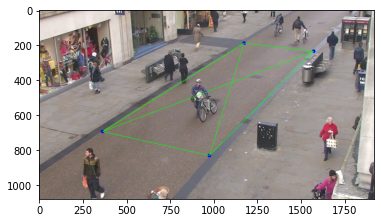

In [0]:
plt.imshow(img)
plt.show()

In [0]:
keypoints_birds_eye_view = [(700,  400), (1200,  400), (1200,  900), (700,  900)]

In [0]:
keypoint = np.float32(keypoints)
keypoints_birds_eye_view = np.float32(keypoints_birds_eye_view)
M = cv2.getPerspectiveTransform(keypoint, keypoints_birds_eye_view)
M

array([[ 1.51746726e+00,  3.71473513e+00, -1.54116535e+03],
       [-2.17719261e-01,  2.62834611e+00,  2.98459072e+02],
       [ 2.36196291e-06,  1.82918297e-03,  1.00000000e+00]])

In [0]:
dst_img = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

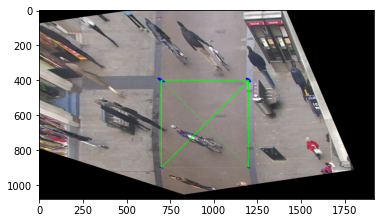

In [0]:
plt.imshow(dst_img)
plt.show()

In [0]:
img = io.imread(img_path)

In [0]:
class Bird_eye_view_Transformer:
    def __init__(self, keypoints, keypoints_birds_eye_view, actual_length, actual_width):
        '''
        keypoints input order 
        0   1

        3   2
        '''
        self.keypoint = np.float32(keypoints)
        self.keypoints_birds_eye_view = np.float32(keypoints_birds_eye_view)
        self.M = cv2.getPerspectiveTransform(self.keypoint, self.keypoints_birds_eye_view)
        self.length_ratio = actual_width/(keypoints_birds_eye_view[3][1] - keypoints_birds_eye_view[0][1])
        self.width_ratio = actual_length/(keypoints_birds_eye_view[1][0] - keypoints_birds_eye_view[0][0])

    def imshow(self, img):
        dst_img = cv2.warpPerspective(img, self.M, (img.shape[1], img.shape[0]))
        plt.imshow(dst_img)
        plt.show()

In [0]:
keypoints = [(1175,  189), (1574,  235), (976,  831), (364,  694)]
keypoints_birds_eye_view = [(700,  400), (1200,  400), (1200,  900), (700,  900)]
actual_length = 10
actual_width = 5


In [0]:
transformer = Bird_eye_view_Transformer(keypoints, keypoints_birds_eye_view, actual_length, actual_width)

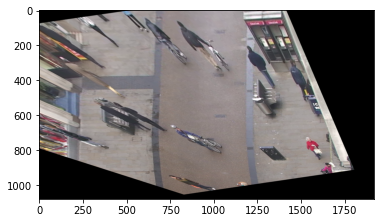

In [0]:
transformer.imshow(img)